In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

import seaborn as sns; sns.set()

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [ ]:
dataset_train.head()

In [ ]:
print("shape: ")
print(dataset_train.shape)
print("columns:") 
print(dataset_train.columns)

In [ ]:
CorrelationMatrix = dataset_train.corr()
CorrelationMatrix["SalePrice"].sort_values(ascending=False)


In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrix, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns);
#Apply yticks
plt.yticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns)
#show plot
plt.show()

Feature extraction:

From the plot we can see that the most prominent features are (Setting the cutoff points as 0.5 correlation)


OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101


Now we inspect these features seperately 

For categorical values, we plot the boxplots; for Quantitative values, we plot the scatterplots


In [ ]:
# OverallQual
feature = 'OverallQual'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GrLivArea

feature = 'GrLivArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))


In [ ]:
# GarageCars
feature = 'GarageCars'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
plot = sns.boxplot(x=feature, y="SalePrice", data=data)


In [ ]:
# GarageArea

feature = 'GarageArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# TotalBsmtSF

feature = 'TotalBsmtSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# 1stFlrSF

feature = '1stFlrSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

In [ ]:
# FullBath
feature = 'FullBath'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# TotRmsAbvGrd
feature = 'TotRmsAbvGrd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearBuilt
feature = 'YearBuilt'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(50, 15))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

In [ ]:
# YearRemodAdd
feature = 'YearRemodAdd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(30, 10))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


Although SalePrice increases slightly with YearBuilt and YearRemodAdd, they do not exhibit strong relationship with the SalePrice, hence we can exclude them from our model analysis.

Therefore we are left with only 9 features and below is a zoomed version of the plot

In [ ]:
features = CorrelationMatrix.nlargest(9, "SalePrice")["SalePrice"].index
CorrelationMatrices = np.corrcoef(dataset_train[features].values.T)

fig, ax = plt.subplots(figsize=(12, 12))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrices, cmap=colormap, annot=True, fmt=".2f", yticklabels=features.values, xticklabels=features.values)


## From this refined plot, we can see that 

GrLivArea correlates with TotRmsAbvGrd; GarageCars correlates with GarageArea, and TotalBsmtSF correlates with 1stFlrSF

Now we check for the homoscedasticity assumptions for the quantitive variables.


Before that, we need to check if there are any missing values in our features.

In [ ]:
dataset_train.isnull().sum().sort_values(ascending=False)

it loosk like all the our selected features do not suffer from missing value concerns, so we can proceed to examine the distribution of quantitive variables.

In [ ]:
dataset_train['SalePrice'].describe()

In [ ]:
print("Skewness: %f" % dataset_train['SalePrice'].skew())
print("Kurtosis: %f" % dataset_train['SalePrice'].kurt())

In [ ]:
sns.distplot(dataset_train['SalePrice'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['SalePrice'], plot=plt)


It doesn't look normal, we need to do somet transformation

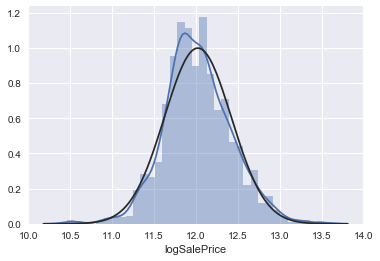

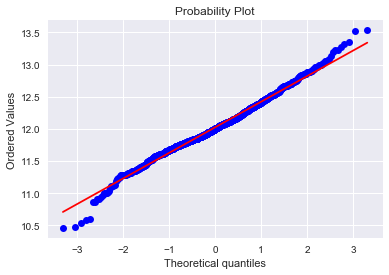

In [3]:
dataset_train['logSalePrice'] = np.log(dataset_train['SalePrice'])

sns.distplot(dataset_train['logSalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(dataset_train['logSalePrice'], plot=plt)

Looks better now
Let's inspect the rest of the quantitative variables
    GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF

In [ ]:
sns.distplot(dataset_train['GrLivArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GrLivArea'], plot=plt)


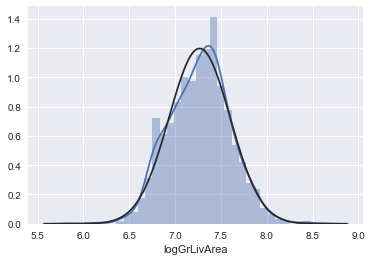

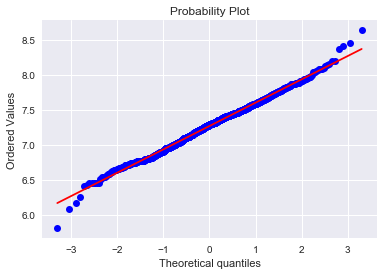

In [4]:
dataset_train['logGrLivArea'] = np.log(dataset_train['GrLivArea'])

sns.distplot(dataset_train['logGrLivArea'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['logGrLivArea'], plot=plt)

In [ ]:
sns.distplot(dataset_train['GarageArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GarageArea'], plot=plt)


Mostly normal, except for some the outliers 

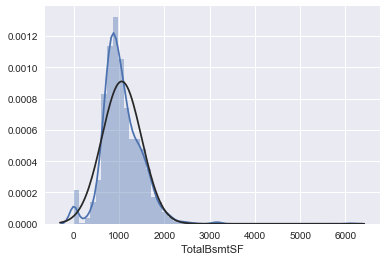

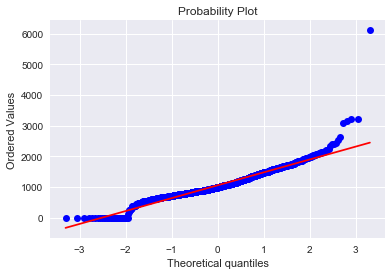

In [5]:
sns.distplot(dataset_train['TotalBsmtSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['TotalBsmtSF'], plot=plt)


For TotalBsmtSF, since there are some 0 values, it is important to treat them differently in the log transformation. 

/Users/petershi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


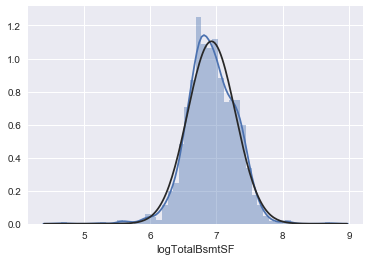

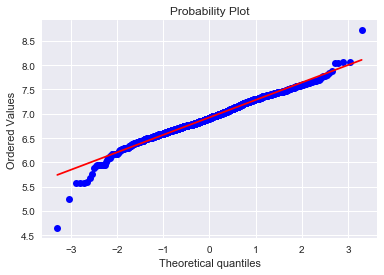

In [6]:
dataset_train['logTotalBsmtSF'] = 0 
dataset_train.loc[dataset_train['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_train['TotalBsmtSF'])


sns.distplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], plot=plt)



In [ ]:
sns.distplot(dataset_train['1stFlrSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['1stFlrSF'], plot=plt)

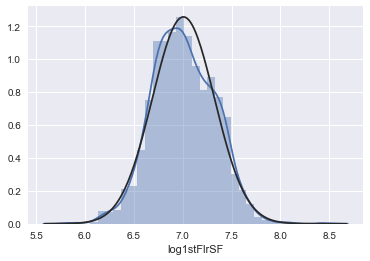

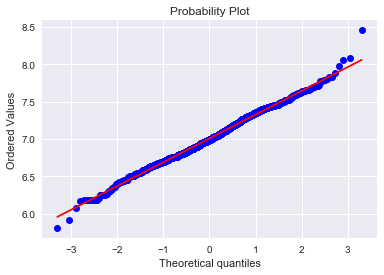

In [7]:
dataset_train['log1stFlrSF'] = np.log(dataset_train['1stFlrSF'])

sns.distplot(dataset_train['log1stFlrSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['log1stFlrSF'], plot=plt)

In [ ]:
variables = ['logSalePrice', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

plot = sns.PairGrid(dataset_train[variables])

plot = plot.map(plt.scatter)


From the plot, we can see that homoscedasticity is fulfilled, if we take out the 0 values from the plot. 

## Model Training

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split

variables = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

df_new = pd.get_dummies(dataset_train[variables], columns=['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'], drop_first=True)

X = df_new.values
y = dataset_train['logSalePrice'].values


X_scaled = StandardScaler().fit_transform(X)

y_scaled = StandardScaler().fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 0)

/Users/petershi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [11]:
y_pred - y_test

array([[ 0.76444515],
       [ 0.27821194],
       [ 0.34817018],
       [ 0.31957188],
       [ 0.61331415],
       [ 0.9101275 ],
       [-0.20026329],
       [-0.0282526 ],
       [-0.74923976],
       [ 0.08738116],
       [-0.10067246],
       [ 0.70324348],
       [-0.17998881],
       [-0.28554186],
       [ 0.30486177],
       [-0.08881446],
       [ 0.24353784],
       [-0.8320672 ],
       [-0.31974989],
       [ 0.21426518],
       [-0.21148911],
       [-0.26953553],
       [ 0.1513711 ],
       [-0.35543255],
       [-0.07999011],
       [ 0.5889911 ],
       [-0.21486132],
       [-0.17404889],
       [ 0.22851169],
       [ 0.04971553],
       [ 1.60382173],
       [-0.20901439],
       [-0.37277809],
       [ 0.33847327],
       [-0.40756203],
       [-0.02803287],
       [ 0.26287254],
       [ 0.18813964],
       [-0.53380394],
       [-0.19595759],
       [-0.20795891],
       [ 0.34266832],
       [ 0.36998701],
       [ 0.15936885],
       [-0.50400852],
       [ 0

In [ ]:
cols = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

plot = sns.PairGrid(dataset_train[cols])

plot = plot.map(plt.scatter)


In [ ]:
# dataset_train.head()

In [ ]:
# cols = ['logSalePrice', 'OverallQual', 'logGrLivArea', 'GarageCars', 'GarageArea', 'log1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd' ]
# # ['logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd' ]


cols = ['logSalePrice', 'OverallQual', 'logGrLivArea', 'GarageCars', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

dataset_train[cols]

In [ ]:
dataset_train[features]
